In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from os import listdir
from os.path import isfile, join


In [4]:
mypath = 'C:/Users/apolo/Downloads/activities'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
import os

os.chdir('C:/Users/apolo/Downloads/activities')

list_data = []

for n in onlyfiles:
    list_data.append(json.load(open("{}".format(n),"rb")))

In [5]:
df = pd.DataFrame()
df2 = pd.DataFrame()
for x in range(0,17):
    teste = list_data[x]
    if "tags.com.nike.weather" not in teste:
        teste["tags.com.nike.weather"] = np.nan
        teste = pd.json_normalize(teste)[["summaries", "tags.com.nike.weather", "tags.com.nike.name", "start_epoch_ms", "end_epoch_ms"]]
    else:
        teste = pd.json_normalize(teste)[["summaries", "tags.com.nike.weather", "tags.com.nike.name", "start_epoch_ms", "end_epoch_ms"]]

    prov = pd.json_normalize(teste.summaries[0])
    prov['metric_all'] = prov.metric+'_'+prov.summary

    final = prov[['metric_all', 'value']].T
    final = final.reset_index(drop=True)
    final.columns = final.iloc[0]
    final = final.tail(1).reset_index(drop=True)
    
    final['clima'] = teste["tags.com.nike.weather"]
    final['dia'] = teste["tags.com.nike.name"]
    final['inicio'] = teste['start_epoch_ms']
    final['fim'] = teste["end_epoch_ms"]

    df = df.append(final).reset_index(drop=True)

    teste = list_data[x]
    dfa = pd.json_normalize(teste, 'metrics', ['id', 'start_epoch_ms', 'end_epoch_ms'])
    dfe = dfa.explode('values').reset_index(drop=True)
    dfj = dfe.join(pd.DataFrame(dfe.pop('values').values.tolist()), rsuffix='_values')
    dfg = dfj.groupby('type')['value'].agg(list).reset_index(name='values_list')
    dfa = dfa.merge(dfg, on='type').drop(columns=['values'])
    desired = dfa.loc[dfa['type'].isin(['steps', 'speed', 'pace'])]
    final2 = pd.DataFrame(desired.values_list.to_list(), index=desired.type.to_list())
    #final['inicio'] = pd.to_datetime(final['inicio'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca').dt.tz_localize(None)
    final2['dia'] = final['inicio'][0]
    
    df2 = df2.append(final2)
    
    
    

In [201]:
col_name="dia"
first_col = df2.pop(col_name)
df2.insert(0, col_name, first_col)

,dia,0,1,2,3,4,5,6,7,8,...,573,574,575,576,577,578,579,580,581,582
steps,1605042901601,13.000000,11.000000,6.000000,13.000000,5.000000,6.000000,3.000000,15.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed,1605042901601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.934825,6.934825,9.171439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pace,1605042901601,8.651985,8.651985,6.542049,6.542049,6.173452,5.769883,5.686466,5.612042,5.583984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
steps,1604698508462,25.000000,7.000000,12.000000,10.000000,11.000000,13.000000,5.000000,8.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed,1604698508462,0.000000,0.000000,0.000000,10.996098,11.122701,11.235841,11.257496,11.257496,11.325550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pace,1604698508462,5.456481,5.394373,5.340054,5.329782,5.329782,5.297756,5.271216,5.259238,5.183622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
steps,1604612548000,13.000000,1.000000,31.000000,11.000000,13.000000,11.000000,5.000000,8.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed,1604612548000,0.000000,0.000000,0.000000,11.176101,11.197308,11.197308,11.569484,11.629207,11.629207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pace,1604612548000,5.368599,5.358431,5.358431,5.186057,5.159423,5.159423,5.144927,6.016847,6.016847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
steps,1605125717000,17.000000,6.000000,1.000000,1.000000,14.000000,13.000000,1.000000,15.000000,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.distance_total = round(df.distance_total.astype(float),2)
df.speed_mean = round(df.speed_mean.astype(float),2)
df.nikefuel_mean = round(df.nikefuel_mean.astype(float),2)
df.pace_mean = round(df.pace_mean.astype(float),2)
df.nikefuel_total = round(df.nikefuel_total.astype(float),2)
df.calories_total = round(df.calories_total.astype(float),2)

df['inicio'] = pd.to_datetime(df['inicio'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca').dt.tz_localize(None)
df['fim'] = pd.to_datetime(df['fim'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca').dt.tz_localize(None)
df['tempo'] = df['fim']-df['inicio']
#df['tempo'] = pd.to_datetime(df['tempo'], format='%H:%M').dt.hour
df2['dia'] = pd.to_datetime(df2['dia'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Argentina/Catamarca').dt.tz_localize(None)

df.steps_total = df.steps_total.astype(float)

In [203]:
df.sort_values('inicio', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [204]:

#transformando pace
df['pace_real'] = df.pace_mean.apply(int) + (round(((df.pace_mean - df.pace_mean.apply(int)) * 60),0) / 100)

df['pace_all_mean'] = round(df.pace_real.mean(),2)
df['distance_all_mean'] = round(df.distance_total.mean(),2)
df['dia_diff'] = df.inicio.diff().dt.days

In [9]:
df['inicio'].dt.date

0     2020-11-10
1     2020-11-06
2     2020-11-05
3     2020-11-11
4     2020-11-26
5     2020-12-19
6     2020-07-23
7     2020-12-12
8     2020-07-23
9     2020-12-05
10    2020-07-28
11    2020-11-09
12    2020-07-21
13    2020-11-07
14    2020-11-08
15    2020-07-20
16    2020-07-14
Name: inicio, dtype: object

In [111]:
print('Período:', (df.fim.max() - df.inicio.min()).days, 'dias')
print('Total corridas:', len(df), 'corridas')
print('Km corridos:', df.distance_total.sum())
print('Intervalo corridas (média):', round(df.dia_diff.mean(),2), 'dias')
print('Pace médio (todas as corridas):', round(df.pace_real.mean(),2))
print('Distância média (todas as corridas):', round(df.distance_total.mean(),2))
print('Total calorias:', round(df.calories_total.sum(),2))

Período: 158 dias
Total corridas: 17 corridas
Km corridos: 53.269999999999996
Intervalo corridas (média): 9.31 dias
Pace médio (todas as corridas): 7.45
Distância média (todas as corridas): 3.13
Total calorias: 3162.21


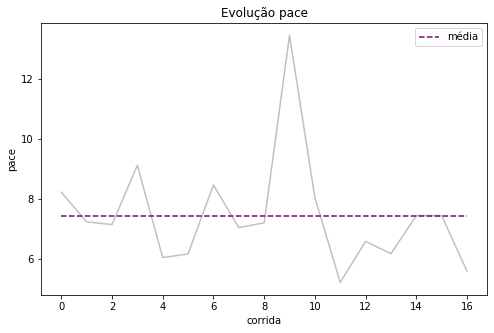

In [112]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver')
plt.plot(df.pace_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução pace")
plt.xlabel("corrida")
plt.ylabel("pace")
plt.legend()


plt.show()

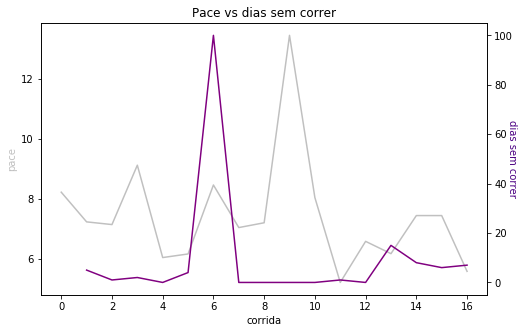

In [113]:
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(df.index, df.pace_real, color='silver')
ax.set_xlabel('corrida')
ax.set_ylabel('pace',color='silver')

ax2=ax.twinx()
ax2.plot(df.index, df.dia_diff,color='purple')
ax2.set_ylabel('dias sem correr',color='indigo', rotation=270)

plt.title('Pace vs dias sem correr')
plt.show()

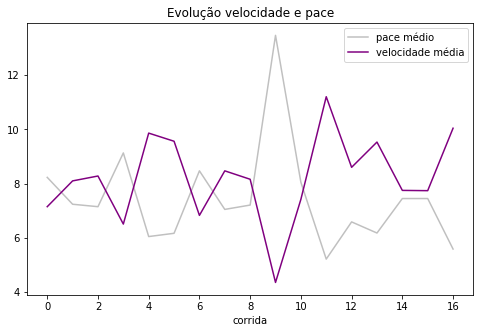

In [218]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver', label='pace médio')
plt.plot(df.speed_mean, color='purple', label = 'velocidade média')
plt.title("Evolução velocidade e pace")
plt.xlabel("corrida")
plt.legend()


plt.show()

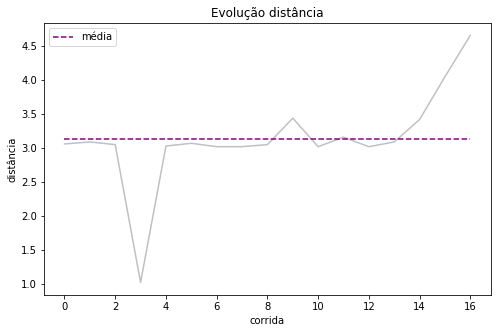

In [13]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.distance_total, color='silver')
plt.plot(df.distance_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução distância")
plt.xlabel("corrida")
plt.ylabel("distância")
plt.legend()


plt.show()

No handles with labels found to put in legend.


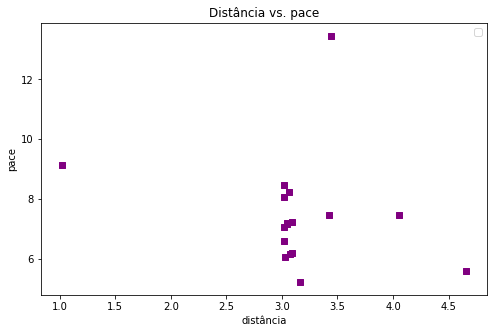

In [115]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.pace_real, color='purple', marker='s')
plt.title("Distância vs. pace")
plt.xlabel("distância")
plt.ylabel("pace")
plt.legend()


plt.show()

No handles with labels found to put in legend.


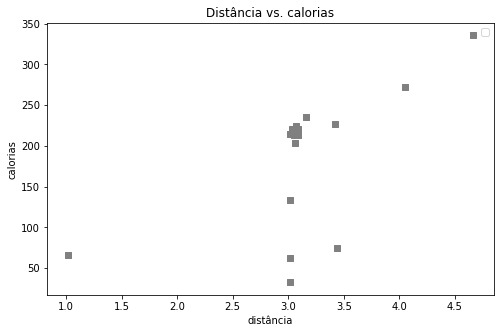

In [116]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.calories_total, color='grey', marker='s')
plt.title("Distância vs. calorias")
plt.xlabel("distância")
plt.ylabel("calorias")
plt.legend()


plt.show()

No handles with labels found to put in legend.


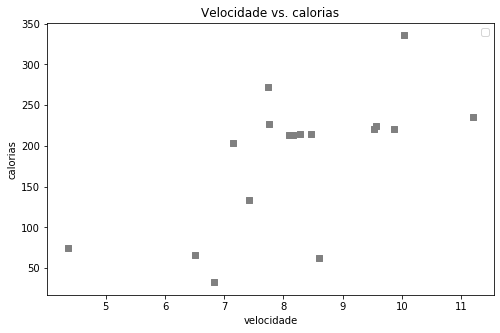

In [117]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.speed_mean, df.calories_total, color='grey', marker='s')
plt.title("Velocidade vs. calorias")
plt.xlabel("velocidade")
plt.ylabel("calorias")
plt.legend()


plt.show()

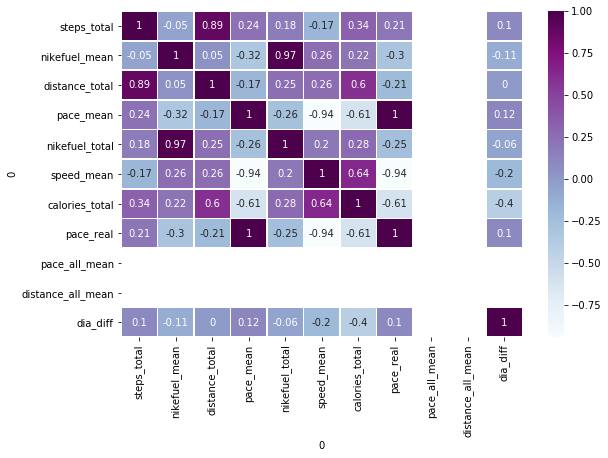

In [118]:
fig = plt.figure(figsize=(9, 6))
sns.heatmap(round(df.corr(),2), annot=True, linewidths=.7, cmap='BuPu')

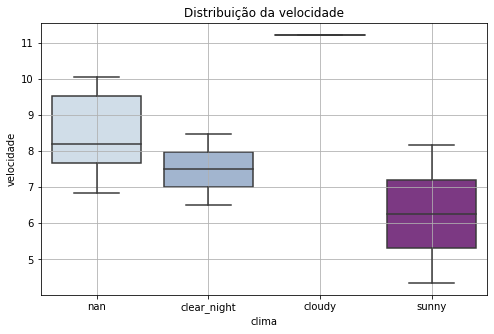

In [119]:
pivot_clima = df[['speed_mean','clima']]
pivot_clima = pivot_clima.pivot(columns='clima', values='speed_mean')

fig = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=pivot_clima, orient="v", palette="BuPu")
plt.ylabel("velocidade")
plt.title("Distribuição da velocidade")
ax.grid()

In [120]:
pivot_clima

clima,NaN,clear_night,cloudy,sunny
0,7.15,NaN,NaN,NaN
1,8.10,NaN,NaN,NaN
2,8.28,NaN,NaN,NaN
3,NaN,6.51,NaN,NaN
4,9.86,NaN,NaN,NaN
5,9.56,NaN,NaN,NaN
6,6.83,NaN,NaN,NaN
7,NaN,8.47,NaN,NaN
8,NaN,NaN,NaN,8.16
9,NaN,NaN,NaN,4.36


# Avaliando resultados dos 7 dias

In [168]:
df2.sort_values('dia', inplace=True)
df2.reset_index(level=0, inplace=True)
df2

,index,dia,0,1,2,3,4,5,6,7,...,573,574,575,576,577,578,579,580,581,582
0,pace,2020-07-14 17:40:48.000,6.031606,6.031606,5.362233,5.267777,5.203732,5.197303,5.162805,5.116460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,steps,2020-07-14 17:40:48.000,16.000000,21.000000,10.000000,9.000000,3.000000,8.000000,14.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,speed,2020-07-14 17:40:48.000,0.000000,0.000000,0.000000,9.947599,9.947599,11.189368,11.390004,11.530186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pace,2020-07-20 09:59:40.031,9.796647,9.796647,9.614898,9.721442,8.324438,7.906268,7.010601,6.908774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,speed,2020-07-20 09:59:40.031,0.000000,0.000000,0.000000,0.000000,0.000000,6.124544,6.124544,6.240316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,steps,2020-07-20 09:59:40.031,16.000000,6.000000,5.000000,7.000000,3.000000,11.000000,2.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,pace,2020-07-21 18:10:08.835,5.571398,5.571398,5.464163,5.312060,5.206036,5.122714,5.081787,5.042271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,speed,2020-07-21 18:10:08.835,0.000000,0.000000,0.000000,0.000000,0.000000,10.769291,10.769291,10.980639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,steps,2020-07-21 18:10:08.835,22.000000,3.000000,6.000000,8.000000,9.000000,8.000000,9.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,pace,2020-07-23 18:20:21.927,5.191257,5.064385,5.035547,5.021659,5.022533,5.018928,5.014885,5.011164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df3 = df2.iloc[18:39, :] #Dias em estudo

In [170]:
pace = df3.loc[df3["index"] == 'pace']
speed = df3.loc[df3["index"] == 'speed']
steps = df3.loc[df3["index"] == 'steps']

In [49]:
pace

,index,dia,0,1,2,3,4,5,6,7,...,573,574,575,576,577,578,579,580,581,582
20,pace,2020-11-05 18:42:28.000,5.368599,5.358431,5.358431,5.186057,5.159423,5.159423,5.144927,6.016847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,pace,2020-11-06 18:35:08.462,5.456481,5.394373,5.340054,5.329782,5.329782,5.297756,5.271216,5.259238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,pace,2020-11-07 18:08:17.659,5.523566,5.500363,5.340730,5.264254,5.205461,5.201508,5.175395,5.166235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,pace,2020-11-08 17:59:23.421,11.146709,11.146709,11.146709,11.278699,11.271672,11.207749,11.178399,11.574074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,pace,2020-11-09 17:41:24.517,4.990962,4.990962,5.018806,5.010017,5.005188,5.007001,5.007001,5.000549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,pace,2020-11-10 18:15:01.601,8.651985,8.651985,6.542049,6.542049,6.173452,5.769883,5.686466,5.612042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,pace,2020-11-11 17:15:17.000,9.113373,9.113373,5.038957,5.038957,5.038957,5.123032,5.173073,5.174046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


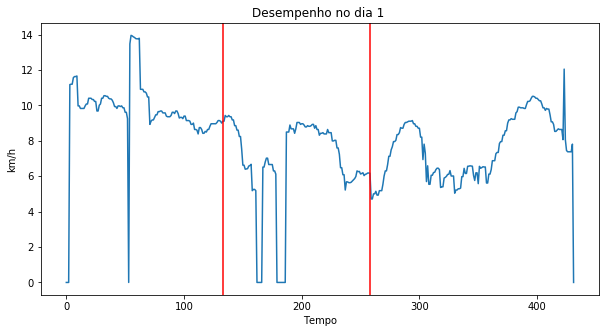

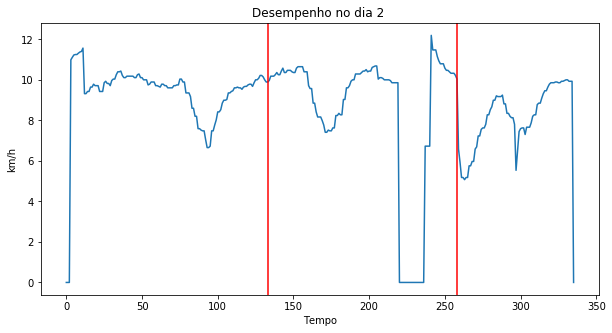

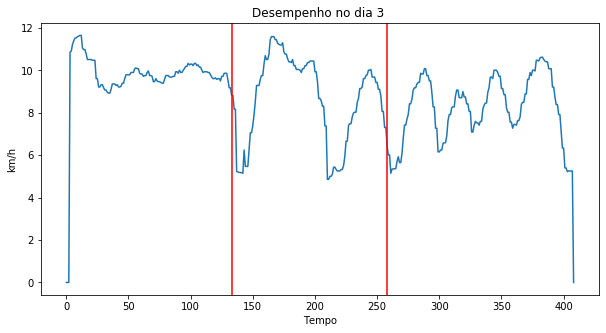

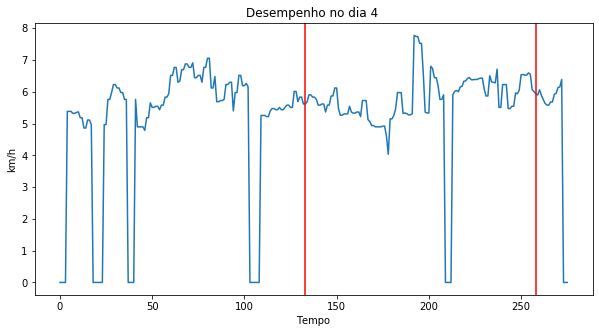

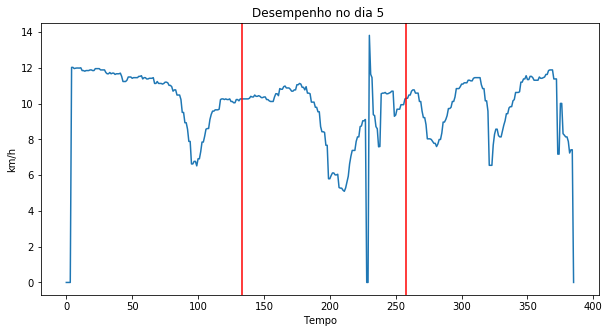

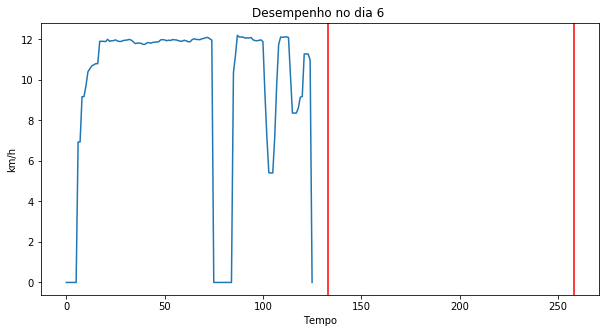

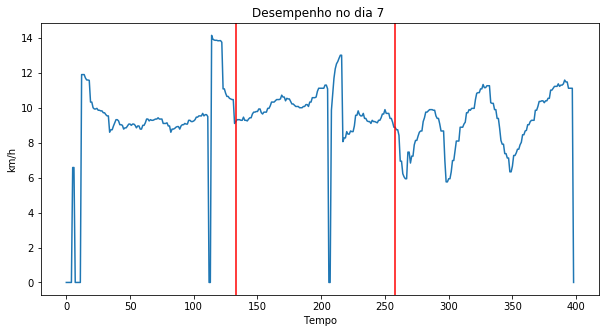

In [268]:
for i in range(0,7):
    d = speed.iloc[i, 2:]
    plt.subplots(figsize=(10, 5))
    d.plot(kind = 'line')
    #plt.axvline(x=133, color = 'r', label = '1 km')
    #plt.axvline(x=258, color = 'r', label = '2 km')
    #plt.axvline(x=111.5, color = 'r', label = '3 km')
    plt.ylabel("km/h")
    plt.xlabel("Tempo")
    plt.title("Desempenho no dia {} ".format(i+1))
    plt.show()

In [215]:
desc_stat = pd.DataFrame()
for i in range(0,7):
    d = speed.iloc[i, 2:]
    new_row = {'Dia':str(i+1), 'Vel. Média': d.mean(), 'Std': d.std(), 'Vel. Max': d.max(), 'Duração': df['tempo'][6+i]}
    desc_stat = desc_stat.append(new_row, ignore_index=True)


desc_stat = desc_stat[['Dia', 'Duração','Vel. Média','Vel. Max','Std']]
desc_stat

,Dia,Duração,Vel. Média,Vel. Max,Std
0,1,0 days 00:33:00.055000,8.001769,13.956680,2.463634
1,2,0 days 00:23:02.565000,8.723487,12.204000,2.595783
2,3,0 days 00:22:31.202000,8.798246,11.651900,1.871716
3,4,0 days 00:48:07.088000,5.265421,7.776000,1.827524
4,5,0 days 00:24:25.676000,9.811112,13.812139,2.112920
5,6,0 days 00:18:13.754000,9.657251,12.197628,4.104545
6,7,0 days 00:22:49.131000,9.247758,14.154105,2.296815


In [ ]:
ini = 1605042918713
end = 1605042920746

ini = pd.to_datetime(ini,unit='ms')
end = pd.to_datetime(end,unit='ms')

end - ini